In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Step-1: Data gathering

In [2]:
data=pd.read_csv('data\\Iris.csv',index_col='Id') # ID column use as index column
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']

In [3]:
data.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

# Step-2:  Data Preprocessing

In [5]:
data['Species']=data['Species'].apply(lambda s: s[5:])
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# Step-3: EDA

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [9]:
data.groupby(by='Species').mean() # return mean value of every species acording to species colume

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


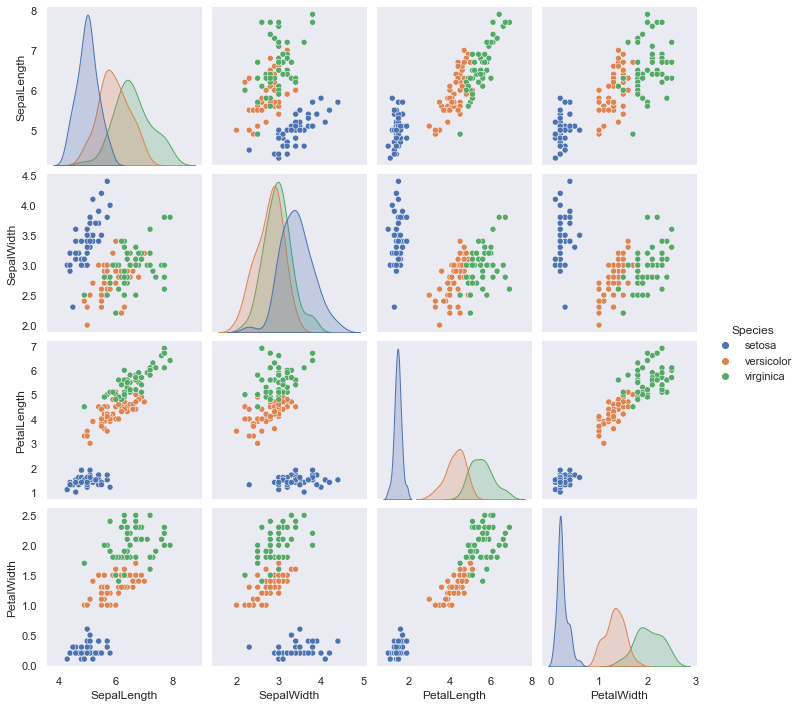

In [10]:
#plt.figure(figsize=(10,10))
sns.set(style='dark')
sns.pairplot(data,hue='Species')
plt.grid()

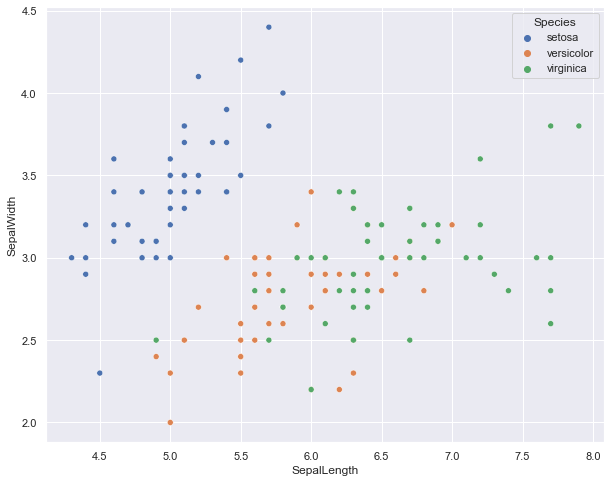

In [11]:
plt.figure(figsize=(10,8))
sns.set(style='dark')
sns.scatterplot(x='SepalLength',y='SepalWidth', data=data,hue='Species',)
plt.grid()

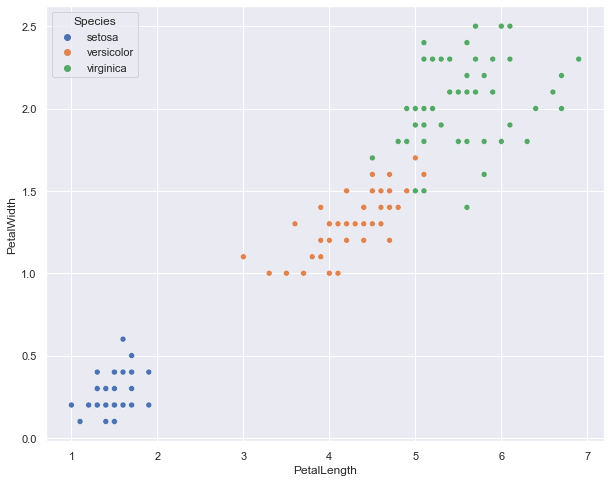

In [12]:
plt.figure(figsize=(10,8))
sns.set(style='dark')
sns.scatterplot(x='PetalLength',y='PetalWidth', data=data,hue='Species',)
plt.grid()

<AxesSubplot:xlabel='PetalLength'>

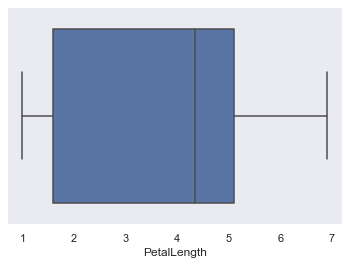

In [13]:
sns.boxplot(data=data,x='PetalLength')

<AxesSubplot:xlabel='PetalWidth'>

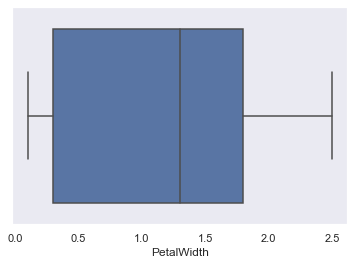

In [14]:
sns.boxplot(data=data,x='PetalWidth')

# Step-4: Feature Engineering and selection

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
# remove warning
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
data['Species']=encoder.fit_transform(data.Species.values.ravel())
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [18]:
data['Species'].ndim

1

In [19]:
# Another process
# target.iloc[:,0]=encoder.fit_transform(target.values.ravel()) 
# target

In [20]:
correlation=data.corr() # getting correlation
correlation

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

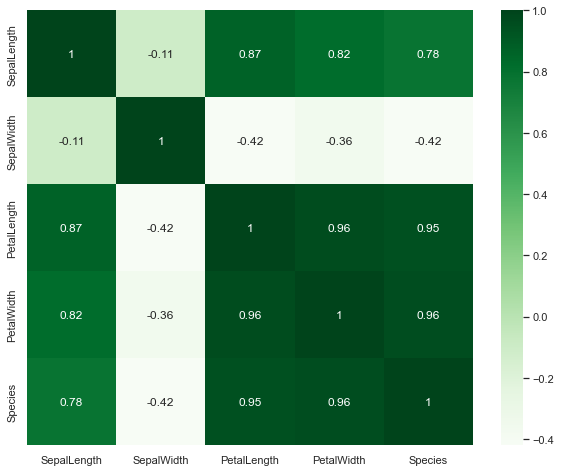

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap='Greens')

In [22]:
data.Species.value_counts() # count number of values of Species column

0    50
1    50
2    50
Name: Species, dtype: int64

In [23]:
Features=data.drop(columns=['Species'])
Features

,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [24]:
target=data[['Species']] # target value put 1D necessary of prediction
target

,Species
Id,
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2


    Train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(Features,target,test_size=0.3,random_state=42)

In [27]:
xtrain.shape

(105, 4)

In [28]:
xtest.shape

(45, 4)

    Feature selection

In [29]:
from sklearn.feature_selection import mutual_info_classif
selector=mutual_info_classif(xtrain,ytrain,random_state=42) # it helps us to select feature which will be important to predict data 
selector # these values are score value of every columns (last two column are most important)

array([0.47605143, 0.23216664, 0.96235843, 0.93971365])

In [30]:
selector=pd.DataFrame(selector) # selector converts into dataframe
selector.columns=['Score']
selector

,Score
0,0.476051
1,0.232167
2,0.962358
3,0.939714


In [31]:
selector.index=Features.columns # selector index take access features column name
selector

,Score
SepalLength,0.476051
SepalWidth,0.232167
PetalLength,0.962358
PetalWidth,0.939714


In [32]:
selector.sort_values('Score', ascending=False) # sorting all values of score

,Score
PetalLength,0.962358
PetalWidth,0.939714
SepalLength,0.476051
SepalWidth,0.232167


<AxesSubplot:>

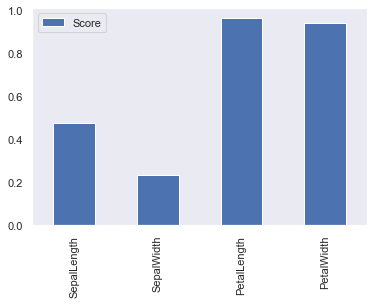

In [33]:
#selector.plot.barh() # ploting bar chart
selector.plot.bar()

In [34]:
# Extra 
selector.sort_index(ascending=False) # # sorting all name of index
Features.sort_values('PetalLength' ,ascending=False)

,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,,,,
119,7.7,2.6,6.9,2.3
123,7.7,2.8,6.7,2.0
118,7.7,3.8,6.7,2.2
106,7.6,3.0,6.6,2.1
132,7.9,3.8,6.4,2.0
...,...,...,...,...
37,5.5,3.5,1.3,0.2
36,5.0,3.2,1.2,0.2
15,5.8,4.0,1.2,0.2


    Best Feature Selection

In [35]:
from sklearn.feature_selection import SelectKBest
extractor=SelectKBest(mutual_info_classif,k=2) # best feature selection according to selector values
extractor.fit(xtrain,ytrain)


SelectKBest(k=2,
            score_func=<function mutual_info_classif at 0x000001BCBE07D1B0>)

In [36]:
best_feature=extractor.get_feature_names_out() # getting best feature name
best_feature

array(['PetalLength', 'PetalWidth'], dtype=object)

# Step-5: Modeling

In [64]:
from sklearn.neighbors import KNeighborsClassifier #  mechine module 
clf=KNeighborsClassifier()         # KNN classifier, which is use for classification

clf.fit(xtrain[best_feature],ytrain) # fit the model

KNeighborsClassifier()

In [65]:
clf.predict(xtest[best_feature]) # prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [66]:
clf.predict(xtest[best_feature])==ytest.values.ravel() # testing model accuricy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

# step-6: Evaluation

In [67]:
from sklearn.metrics import accuracy_score , confusion_matrix, plot_confusion_matrix    # sklearn.metrics stores all evaluation module
accuracy_score(clf.predict(xtest[best_feature]), ytest) # accuracy_score=1 means our model is 100% fitted/accurate, here no miss classification in this data

1.0

# step-7: Cross validation

In [68]:
from sklearn.model_selection import cross_val_score 
cv=cross_val_score(clf, Features[best_feature], target, cv=5) # cross validation checking 
                                                               # cv=5 referce the number of cross validation set
cv

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [69]:
cv.mean() # mean value of all cross values which is actual accracy

0.9666666666666668

# Step-8: Model tuning

In [70]:
KNeighborsClassifier?   # Getting parameter name

SyntaxError: invalid syntax (2170973878.py, line 1)

In [71]:
KNeighborsClassifier().get_params() # Return Parameter names mapped to their values as a dictionary formet.

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

** Another way of model tuning  **

Another approach of model tuning which works dynamically
By this we can easily find uot best model applying cross validation
It will do all the possible combination and try to find out the best combination which provide best accuricy

In [78]:
from sklearn.model_selection import GridSearchCV
clf2=KNeighborsClassifier()

In [93]:
Grid=GridSearchCV(
    clf2,
    param_grid={
    
       'n_neighbors': [5,7,9,11,15,17,19,21,23],
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
        'metric': ['minkowski','euclidean','manhattan','hamming']
    },
    cv=5, scoring='neg_mean_squared_error' # here depend on 'neg_mean_squared_error' score we find out best model
)
Grid.fit(Features[best_feature],target) # fit the model to the grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'hamming'],
                         'n_neighbors': [5, 7, 9, 11, 15, 17, 19, 21, 23],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [94]:
Grid.best_params_ # find the best parametter for this data set

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [95]:
Grid.best_score_ # return score of accoricy

-0.03333333333333333

In [96]:
Grid.best_estimator_ # it suggest bet model for this data set

KNeighborsClassifier()

# Step-9: Model Visualization

In [97]:
clf3=Grid.best_estimator_
clf3.fit(Features[best_feature],target)

KNeighborsClassifier()

In [50]:
#Features.PetalLength.values #convert into values

linspeice work on only one axis
meshgrid work on two axis

In [100]:
xmin,xmax=Features.PetalLength.values.min(), Features.PetalLength.values.max()  # petalLength stay x-axis 
ymin,ymax=Features.PetalWidth.values.min(), Features.PetalWidth.values.max() # petalWidth stay y-axis 
xx,yy=np.meshgrid(
    np.arange(xmin-0.2, xmax+0.2, 0.001), np.arange(ymin-0.2,ymax+0.2,0.001)
)


In [101]:
grid=np.c_[xx.ravel(), yy.ravel()] # covert 2D to 1D and concat value of x(PetalLength) with value of y(PetalWidth)
grid

array([[ 0.8  , -0.1  ],
       [ 0.801, -0.1  ],
       [ 0.802, -0.1  ],
       ...,
       [ 7.098,  2.699],
       [ 7.099,  2.699],
       [ 7.1  ,  2.699]])

In [102]:
ypred_2=clf.predict(grid) # predict the grid
ypred_2

array([0, 0, 0, ..., 2, 2, 2])

In [103]:
ypred_2=ypred_2.reshape(yy.shape) # reshape 1D to 2D 
ypred_2

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

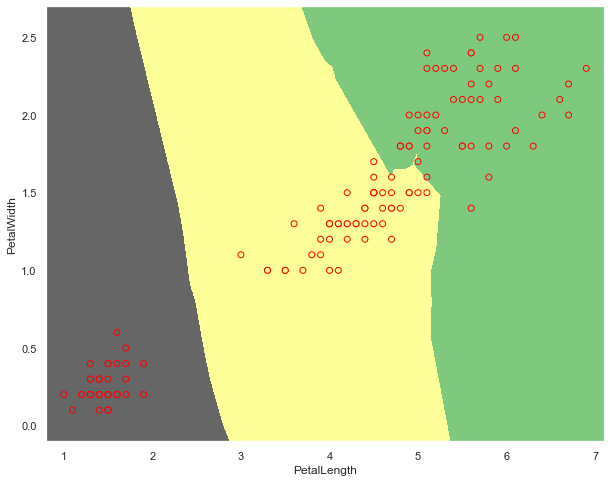

In [104]:
plt.figure(1,figsize=(10,8))
plt.pcolormesh(xx,yy,ypred_2)
plt.set_cmap(plt.cm.Accent_r)
predictions=clf3.predict(Features[best_feature])
plt.scatter(Features.PetalLength,Features.PetalWidth, c=predictions,edgecolors='red')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

In [56]:
xx.shape

(2800, 6301)

In [57]:
yy.shape

(2800, 6301)

In [58]:
ytest.shape

(45, 1)